### <p style="background-color:#627D50;color:#D1CABD;font-size:110%;text-align:center;border-radius:20px 60px;  border: 10px solid #cfcfcf;  padding-top: 10px;  padding-left: 10px;  padding-right: 10px; padding-bottom: 10px;  border-radius: 80px 20px;line-height: 1.2em; margin-bottom: 10px;"> **Projet 6** : Classifiez automatiquement des biens de consommation </p>

<img src="place_marche.png" align="right" alt="Alternative text" />

Vous êtes ***Data Scientist*** au sein de l'entreprise ***Place de marché***, qui souhaite lancer une marketplace e-commerce.

Sur la place de marché, des vendeurs proposent des articles à des acheteurs en postant une photo et une description.

Pour l'instant, l'attribution de la catégorie d'un article est effectuée manuellement par les vendeurs, et est donc **peu fiable**. De plus, le volume des articles est pour l'instant très petit.

Pour une meilleure expérience des vendeurs et des acheteurs, et dans l'optique d'un passage à l'échelle, ***il devient nécessaire d'automatiser cette tâche***.

*************************
- Mentor [**Babou M'BAYE**]()
- Etudiant [**Bourama FANE**](https://www.linkedin.com/in/bourama-fan%C3%A9-7aba41141/)
- Parcours [*Data Scientist*]()
- Ecole [*OpenClassrooms*](https://openclassrooms.com/fr)
- Date : [Juillet 2023]()

<!-- <style>
.right-align {
    text-align: right;
}
</style>

<ul class="right-align">
    <li>Mentor [**Babou M'BAYE**]()</li>
    <li>Etudiant [**Bourama FANE**](https://www.linkedin.com/in/bourama-fan%C3%A9-7aba41141/){:target="_blank"}</li>
    <li>Parcours [*Data Scientiste*]()</li>
</ul>
--- -->

[<font color="#337da4"> <h5> Problématique](#contexte)</h5>
[<font color="#337da4"> <h5> Librairies](#lib)</h5>
[<font color="#337da4"> <h5> 1. Chargement et split des données ](#1)</h5> 
[<font color="#337da4"> <h5> 2. Classification supervisée](#2)</h5> 
[<font color="#337da4"> <h5> 3. Data augmentation](#3)</h5>
[<font color="#337da4"> <h5> 4. API](#4)</h5>
    

### <font color="#337da4" id="contexte">Problématique </font>
----------------------------

**Contexte**
*****
L' entreprise **Place de marché souhaite** lancer une marketplace e-commerce. Pour cela, les vendeurs doivent attribuer une catégorie manuellement à leurs produits à partir d'une description et d'une photo.  Afin de passer à une plus large échelle et faciliter le processus, il devient nécessaire d'automatiser cette tâche.

**Mission**
*****
Réaliser une première **étude de faisabilité** d'un moteur de **classification d'articles** basé sur une **image et une description** pour l'**automatisation** de l'attribution de la **catégorie de l'article**.

**Objectifs**
*****
- analyser le jeu de données,
- réaliser :
    > un prétraitement des descriptions des produits<br>
    > une réduction de dimension, <br>
    > un prétraitement des images,<br>
    > puis un clustering. 

La représentation graphique aidera à convaincre que cette approche de modélisation permettra bien de regrouper des produits de même catégorie.

**Contraintes**
*****

Afin d'extraire les features texte, il sera nécessaire de mettre en oeuvre : 
- deux approches de type **bag-of-words**, comptage simple de mots et **Tf-idf** ;<br>
- une approche de type **word/sentence embedding** classique avec Word2Vec (ou Glove ou FastText) ;<br>
- une approche de type word/sentence embedding avec **BERT** ;<br>
- une approche de type word/sentence embedding avec **USE** (Universal Sentence Encoder). 

**Sources**
*****

Pour cette mission, le jeu de données est disponible [ici](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Textimage+DAS+V2/Dataset+projet+pre%CC%81traitement+textes+images.zip)

**Livrables :**

Afin de répondre à cette mission, trois notebook seront été réalisés : 
>  ***Notebook 1*** : Analyse des données textuelles (description) et clusterisation <br>
>  ***Notebook 2*** : Analyse des données visuelles (images) et clusterisation<br>
>  ***Notebook 3*** : Combinaison du meilleur modèle de texte et d'image et classification supervisée<br>
>  ***Presentation***: Support de presentation. 

In [1]:
%%time
# Built-in
import os, warnings 
from tqdm import tqdm
# from tqdm.notebook import tqdm

# Data
import numpy as np
import pandas as pd
import sidetable

#Visualisation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import missingno as msno
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
import plotly.express as px
# !pip install dataframe_to_image
import dataframe_image as dfi

# NLP
import nltk #/!\ attention use nltk.download('punkt')
from nltk.stem.snowball import EnglishStemmer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from nltk.corpus import words, stopwords


# Cluster
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import silhouette_score, adjusted_rand_score, silhouette_samples
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Les bibliothèques tensorflow.keras 
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model  # Import the Model class
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from plot_keras_history import show_history, plot_history
from tensorflow.keras.models import load_model

# Modele
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50

# metrics, classification_repo
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import (silhouette_samples,silhouette_score, adjusted_rand_score,
                             adjusted_mutual_info_score,confusion_matrix, pair_confusion_matrix,
                            ConfusionMatrixDisplay)

# date
from datetime import date, time, datetime, timedelta
from dateutil.relativedelta import relativedelta

# from markdown import Markdown
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings("ignore")

from pandarallel import pandarallel

# Chemin
# imgPath='C:/Users/Fane0763/OpenClassroom/OC Projet 6/Graphs/'
SAVE_IMAGES = True

# Nombre aléatoire pour la reproductibilité des résultats
random_state = 42

class clr:
    start = '\033[93m'+'\033[1m'
    color = '\033[93m'
    end = '\033[0m'
    
# Affichage des valeurs
# pd.set_option('display.max_colwidth', None)

# Police et reglages
font_title = {'family': 'serif', 'color':  '#114b98', 'weight': 'bold', 'size': 16,}
font_title2 = {'family': 'serif', 'color':  '#114b98', 'weight': 'bold', 'size': 12,}
font_title3 = {'family': 'serif', 'color':  '#4F6272', 'weight': 'bold', 'size': 10,}

mycolors = ["black", "hotpink", "b", "#4CAF50"]
AllColors=['#99ff99', '#66b3ff', '#4F6272', '#B7C3F3', '#ff9999', '#ffcc99', '#ff6666', '#DD7596', '#8EB897',
           '#c2c2f0', '#DDA0DD', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', 
           '#7f7f7f', '#bcbd22', '#17becf', '#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33',
           '#a65628', '#f781bf', "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#000000"]

%matplotlib inline

CPU times: total: 4.81 s
Wall time: 18.5 s


In [2]:
# Appel de mes propres functions
from function_cp import *

./Flipkart/Graphs


In [3]:
import sys

def is_colab_environment():
    # Vérifier si le module 'google.colab' est présent dans la liste des modules importés
    return 'google.colab' in sys.modules

# Exemple d'utilisation
if is_colab_environment():
    print("Le code s'exécute dans l'environnement Google Colab.")
else:
    print("Le code s'exécute dans un environnement local.")


Le code s'exécute dans un environnement local.


In [4]:
# --------------------------------------------------------------------
# Fonction pour créer un dossier s'il n'existe pas déjà
# --------------------------------------------------------------------
def os_make_dir(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)


# --------------------------------------------------------------------
# Fonction pour rejoindre un dossier et un fichier
# --------------------------------------------------------------------
def os_path_join(folder, file):
    """Remplacement pour `os.path.join(folder, file)` sur Windows"""
    return f'{folder}/{file}'

In [5]:
# Configuration des chemins de dossiers pour les différents environnements
if not is_colab_environment():
    # Développement local
    DATA_FOLDER = './Flipkart'
    # Création d'une variable IMG_FOLDER pour le chemin complet du dossier d'images
    IMG_FOLDER = os_path_join(DATA_FOLDER,'Images')
    OUT_FOLDER = f'{DATA_FOLDER}/output'
    IMAGE_FOLDER = f'{DATA_FOLDER}/Images'
    GRAPH_FOLDER= os_path_join(DATA_FOLDER,'Graphs') # graphique pour les diapos
    IMG_FOLDER_PROCESS=os_path_join(DATA_FOLDER,'Images_process') # Images traitées

    
# Définition des chemins de dossiers pour l'environnement Colab
if is_colab_environment():
    # Colaboratory - décommentez les 2 lignes suivantes pour connecter à votre drive
    # from google.colab import drive
    # drive.mount('/content/drive')
    DATA_FOLDER = '/content/drive/MyDrive/OC-Projet-6'
    
    # Création d'une variable IMG_FOLDER pour le chemin complet du dossier d'images
    IMG_FOLDER = os_path_join(DATA_FOLDER,'Flipkart/Images')
    OUT_FOLDER = f'{DATA_FOLDER}/Flipkart/output'
    IMAGE_FOLDER = f'{DATA_FOLDER}/Flipkart/Images'
    GRAPH_FOLDER= os_path_join(DATA_FOLDER,'Flipkart/Graphs') # graphique pour les diapos
    IMG_FOLDER_PROCESS=os_path_join(DATA_FOLDER,'Flipkart/Images_process') # Images traitées

SAVE_IMAGES = True
# imgPath = f'{DATA_FOLDER}/Graphs'
# if not os.path.exists(imgPath[:-1]):
#     os.makedirs(imgPath[:-1])

# Crée les dossiers spécifiés s'ils n'existent pas déjà
os_make_dir(IMAGE_FOLDER)
os_make_dir(OUT_FOLDER)
os_make_dir(GRAPH_FOLDER)  # graphique pour les diapos
os_make_dir(IMG_FOLDER_PROCESS)
imgPath=f'{GRAPH_FOLDER}/'
print(GRAPH_FOLDER)  
os.listdir(DATA_FOLDER)[:5]

./Flipkart/Graphs


['.ipynb_checkpoints',
 'BERT2_features.csv',
 'BERT_features.csv',
 'BOW_features.csv',
 'classification']

In [6]:
# !apt-get install tree
# #clear_output()
# # create new folders
# # !mkdir TRAIN TEST VAL TRAIN/YES TRAIN/NO TEST/YES TEST/NO VAL/YES VAL/NO
# !tree -d

'apt-get' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


Structure du dossier
Le num‚ro de s‚rie du volume est 000000B6 146C:0F91
C:\USERS\FANE0763\OPENCLASSROOM\OC PROJET 6\-D
Chemin d'accŠs non valide - \USERS\FANE0763\OPENCLASSROOM\OC PROJET 6\-D
Aucun sous-dossier existant 



In [7]:
import os
def afficher_arborescence(dossier, niveau=0):
    contenu = os.listdir(dossier)
    for element in contenu:
        chemin = os.path.join(dossier, element)
        if os.path.isdir(chemin):
            print("  " * niveau + f"📁 {element}/")
            afficher_arborescence(chemin, niveau + 1)
        else:
            print("  " * niveau + f"📄 {element}")

# Remplacez le chemin ci-dessous par le chemin absolu du dossier que vous souhaitez afficher
# chemin_dossier = "./"
# afficher_arborescence(chemin_dossier)

In [8]:
import os

def afficher_schema_arborescence(dossier, prefixe=""):
    contenu = os.listdir(dossier)
    taille_contenu = len(contenu)

    for index, element in enumerate(contenu):
        est_dernier = index == taille_contenu - 1
        marqueur = "└── " if est_dernier else "├── "

        chemin = os.path.join(dossier, element)
        est_dossier = os.path.isdir(chemin)

        print(prefixe + marqueur + element)
        
        if est_dossier:
            nouveau_prefixe = prefixe + ("    " if est_dernier else "│   ")
            afficher_schema_arborescence(chemin, nouveau_prefixe)

# Remplacez le chemin ci-dessous par le chemin absolu du dossier que vous souhaitez afficher
# print(chemin_dossier)
# afficher_schema_arborescence(chemin_dossier)

In [9]:
def fig_name_cleaning(fig_name: str) -> str:
    """Enlever les caractères interdits dans les filenames ou filepaths"""
    return fig_name.replace(' ', '_').replace(':', '-').replace(
        '.', '-').replace('/', '_').replace('>', 'gt.').replace('<', 'lt.')


def to_png(fig_name=None) -> None:
    """
    Register the current plot figure as an image in a file.
    Must call plt.show() or show image (by calling to_png() as last row in python cell)
    to apply the call 'bbox_inches=tight', to be sure to include the whole title / legend
    in the plot area.
    """

    def get_title() -> str:
        """find current plot title (or suptitle if more than one plot)"""
        if plt.gcf()._suptitle is None:  # noqa
            return plt.gca().get_title()
        else:
            return plt.gcf()._suptitle.get_text()  # noqa

    if SAVE_IMAGES:
        if fig_name is None:
            fig_name = get_title()
        elif len(fig_name) < 9:
            fig_name = f'{fig_name}_{get_title()}'
        fig_name = fig_name_cleaning(fig_name)
        print(f'"{fig_name}.png"')
        plt.gcf().savefig(
            # f'{IMAGE_FOLDER}/{fig_name}.png', bbox_inches='tight')
            imgPath+f'{fig_name}.png', bbox_inches='tight')


In [10]:
import os
import shutil
from sklearn.model_selection import train_test_split
# Chemin vers le dossier contenant toutes les images
data_dir        =  IMG_FOLDER
# Chemin vers le dossier du jeu de données
dataset_dir     =  DATA_FOLDER
train_dir       =  os_path_join(dataset_dir, 'train')
validation_dir  =  os_path_join(dataset_dir, 'validation')
test_dir        =  os_path_join(dataset_dir, 'test')

for folder in [train_dir, validation_dir, test_dir]:
    try:
        shutil.rmtree(folder)
        print(f"Le dossier '{folder}' et son contenu ont été supprimés avec succès.")
    except OSError as e:
        print(f"{e}")

Le dossier './Flipkart/train' et son contenu ont été supprimés avec succès.
Le dossier './Flipkart/validation' et son contenu ont été supprimés avec succès.
Le dossier './Flipkart/test' et son contenu ont été supprimés avec succès.


In [11]:
os_make_dir(train_dir)
os_make_dir(validation_dir)
os_make_dir(test_dir)
print(train_dir)

./Flipkart/train


### <font color="#337da4" id="1">1. Chargement et split des données </font>
----------------------------

In [12]:
dfmarket=pd.read_csv('dfcleaned.csv')
dfmarket.head()

,product_name,image,description,cat_code,category1,clean_description,clean_description_ws,_len_description
0,Elegance Polyester Multicolor Abstract Eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,4,Home Furnishing,key feature elegance polyester multicolor abst...,key feature elegance polyester multicolor abst...,1420
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,0,Baby Care,specification sathiyas cotton bath towel bath ...,specification sathiyas cotton bath towel bath ...,444
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,0,Baby Care,key feature eurospa cotton terry face towel se...,key feature eurospa cotton terry face towel se...,1258
3,SANTOSH ROYAL FASHION Cotton Printed King size...,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,4,Home Furnishing,key feature santosh royal fashion cotton print...,key feature santosh royal fashion cotton print...,858
4,Jaipur Print Cotton Floral King sized Double B...,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,4,Home Furnishing,key feature jaipur print cotton floral king si...,key feature jaipur print cotton floral king si...,1197


In [13]:
# Pour mélanger les images, classées initalement par classe
data   =  dfmarket.sample(frac=1, random_state=random_state).reset_index(drop=True)
data.head()

# Diviser les données en ensembles d'entraînement, de validation et de test
train_data, temp_data  =  train_test_split(data, test_size=0.4, random_state=random_state)
val_data, test_data    =  train_test_split(temp_data, test_size=0.5, random_state=random_state)
train_data.head(3)

,product_name,image,description,cat_code,category1,clean_description,clean_description_ws,_len_description
69,HMT Sonata Gold Plated Watch For Men Sonata An...,1fcff864d6e397e1424d5366e6c6b8fa.jpg,HMT Sonata Gold Plated Watch For Men Sonata An...,6,Watches,hmt sonata gold plated watch men sonata analog...,hmt sonata gold plated watch for men sonata an...,328
291,Nirlon Kadhai 3 L,724e6eb7edc83eb48b6492d12e940ebd.jpg,Buy Nirlon Kadhai 3 L for Rs.785 online. Nirlo...,5,Kitchen & Dining,buy nirlon kadhai online nirlon kadhai best pr...,buy nirlon kadhai for online nirlon kadhai bes...,165
131,Goldencollections GC4353 Makeup and Jewellery ...,9613f2f1e65fb1fc7e181e7f83c217da.jpg,Buy Goldencollections GC4353 Makeup and Jewell...,1,Beauty and Personal Care,buy goldencollections makeup jewellery vanity ...,buy goldencollections makeup and jewellery van...,247


Ce fichier contient **plusieurs sous-fichiers** hiérarchisés:
- **train**, pour l'entraînement du modèle
- **validation**, pour vérifer si le modèle est overfit
- **test**, pour tester le modèle

Chacun de ces fichiers contient des sous dossiers avec le label des **catégories**.

In [14]:
from tqdm import tqdm
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
import cv2
import shutil


from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


# Prétraitement des images pour le modèle VGG16 (mise à l'échelle)
def preprocess_vgg16(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img # img_to_array(img)
    #img_array = np.expand_dims(img_array, axis=0)
    #img_array = img_array.reshape((img_array.shape[0], img_array.shape[1], img_array.shape[2]))
    img_array = preprocess_input(img_array)
    return img_array

# def copy_images(data, from_dir, dest_dir):
#     for index, row in tqdm(data.iterrows(), total=len(data)):
#         label      =  row['category1'].strip()
#         image_path =  os_path_join(from_dir, row['image'])
#         label_dir  =  os_path_join(dest_dir, label)        
#         # Traitement des images
#         img   = load_img(image_path, target_size=(224, 224)) # cv2.imread(image_path)
#         # img   = img_to_array(img)     
#         os_make_dir(label_dir)
#         # Chemin 
#         chemin_source      =  os_path_join(from_dir, row['image'])
#         chemin_destination =  os_path_join(label_dir, row['image'])
#         # # Copie
#         shutil.copy(chemin_source, chemin_destination)
#         #cv2.imwrite(os_path_join(label_dir, row['image']), img)

 # Liste des extensions d'images que vous souhaitez copier (par exemple : ['.jpg', '.png', '.jpeg'])
# extensions_images = ['.jpg', '.png', '.jpeg']
# def copy_images(data, from_dir, dest_dir):
#     for index, row in tqdm(data.iterrows(), total=len(data)):
#         label = row['category1'].strip()
#         # Vérification de l'extension du fichier
#         if any(row['image'].lower().endswith(ext) for ext in extensions_images):
#             # Chemin 
#             chemin_source      =  os_path_join(from_dir, row['image'])
#             # Convertir l'image en niveaux de gris
#             image = Image.open(chemin_source)
#             image_gray = image.convert("L")
#             label_dir      =  os_path_join(dest_dir, label)
#             os_make_dir(label_dir)
#             chemin_destination =  os_path_join(label_dir, row['image'])
#                 # Enregistrer l'image convertie en niveaux de gris dans le dossier de destination
#             image_gray.save(chemin_destination)
#             # Copie
#             # shutil.copy(chemin_source, chemin_destination)
#     print(dest_dir)        
#     print("Copie des images terminée.")
    
# Utilisation de la fonction copy_images avec une barre de progression
copy_images(train_data, IMG_FOLDER, train_dir)
copy_images(val_data, IMG_FOLDER, validation_dir)
copy_images(test_data, IMG_FOLDER, test_dir)


100%|███████████████████████████████████████████████████████████████████████████████| 630/630 [00:03<00:00, 200.27it/s]


./Flipkart/train
Copie des images terminée.


100%|███████████████████████████████████████████████████████████████████████████████| 210/210 [00:00<00:00, 238.72it/s]


./Flipkart/validation
Copie des images terminée.


100%|███████████████████████████████████████████████████████████████████████████████| 210/210 [00:00<00:00, 242.00it/s]

./Flipkart/test
Copie des images terminée.


In [15]:
# import os
for folder in tqdm([train_dir, validation_dir, test_dir]):
    for label in os.listdir(folder):
        print(f'total {folder} : {label:30}', len(os.listdir(os_path_join(folder, label))))

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 280.21it/s]

total ./Flipkart/train : Baby Care                      89
total ./Flipkart/train : Beauty and Personal Care       93
total ./Flipkart/train : Computers                      88
total ./Flipkart/train : Home Decor & Festive Needs     87
total ./Flipkart/train : Home Furnishing                95
total ./Flipkart/train : Kitchen & Dining               88
total ./Flipkart/train : Watches                        90
total ./Flipkart/validation : Baby Care                      33
total ./Flipkart/validation : Beauty and Personal Care       32
total ./Flipkart/validation : Computers                      32
total ./Flipkart/validation : Home Decor & Festive Needs     26
total ./Flipkart/validation : Home Furnishing                29
total ./Flipkart/validation : Kitchen & Dining               27
total ./Flipkart/validation : Watches                        31
total ./Flipkart/test : Baby Care                      28
total ./Flipkart/test : Beauty and Personal Care       25
total ./Flipkart/test :

### <font color="#337da4" id="2">2. Classification supervisée </font>
----------------------------

In [16]:
# ---------------------------------------------------------------------------
# Configuration des paramètres principaux du modèle
# ---------------------------------------------------------------------------
# Le chemin vers la sauvegarde du réseau
model_save_path    = os_path_join(DATA_FOLDER, 'model')    

# Les chemins vers les jeu de données
TRAINING_DIR       = train_dir
TESTING_DIR        = test_dir

IMGSIZE            = 224    # Taille de l'image en input
EPOCH              = 20     # nombre d'epoch 
BATCH_SIZE         = 16     # traitement par batch d'images avant la descente de gradient
FREEZE_LAYERS      = 15     # pour un VGG16 freeze de réapprentissage de certaines couches
TRAIN              = True   # Entrainement ou utilisation d'un réseau déjà entrainé


In [17]:
# Nous allons créer le dossier de stockage des modeles implementés.
os_make_dir(os_path_join(DATA_FOLDER, 'model'))

On a **initialisé nos générateurs**, maintenant il faut leur **indiquer où chercher nos images** !

Pour cela, on utilise la fonction *flow_from_directory*  qui permet de charger des **lots de données** depuis un chemin de fichier.


Les [**paramètres**](https://ichi.pro/fr/methodes-de-flux-de-keras-imagedatagenerator-et-quand-les-utiliser-203621254419857) que l'on utilise :
- **le chemin du fichier**, que l'on a déjà stocké dans des variables plus tôt

- **batch_size**, la taille du lot d'images à charger. Ici on choisit des lots de **BATCH_SIZE = 16 images**.

- **target_size**, le générateur peut redimensionner automatiquement la hauteur et la largeur des images chargés. On choisit une dimension petite de **224x224** pour que le modèle s'entraîne plus rapidement

- **class_mode**, ce paramètre permet de choisir le type de labellisation que l'on veut **'categorical', 'binary', etc.** !

[details sur les autres paramètres!](https://keras.io/api/preprocessing/image/)

 * [x] **directory**: Le chemin du répertoire contenant les images à charger. Chaque sous-dossier dans ce répertoire est généralement considéré comme une classe distincte lors de la classification d'images.

 * [x] **target_size**: Une tuple représentant les dimensions cibles (**largeur, hauteur**) pour redimensionner les images avant de les fournir au modèle. Les images seront redimensionnées pour s'ajuster à cette taille.

 * [x] **batch_size**: Le nombre d'images à inclure dans chaque lot (**batch**) d'entraînement. Cela détermine le nombre d'images qui seront chargées à chaque étape d'entraînement.

 * [x] **class_mode**: Le mode de classe pour la génération des étiquettes. Les options courantes sont :

   * [x] **"categorical"** : Utilisé pour la classification multiclasse, où les étiquettes sont codées en tant que vecteurs one-hot.
   * [x] **"binary"** : Utilisé pour la classification binaire, où les étiquettes sont soit **0**, soit **1**.
   * [x] **"sparse"** : Utilisé pour la classification multiclasse, où les étiquettes sont des entiers représentant les classes.
   * [x] **"None"** : Utilisé si vous ne souhaitez pas générer d'étiquettes. Cela est utile lors de la prédiction sur de nouvelles données.
 * [x] **shuffle**: Un booléen indiquant si les données doivent être mélangées à chaque époque (**epoch**). Cela aide à améliorer la généralisation du modèle en évitant qu'il ne mémorise l'ordre des données.

 * [x] **color_mode**: Le mode de couleur des images à charger. Les options courantes sont "rgb" (images couleur), "grayscale" (images en niveaux de gris) ou "rgba" (images couleur avec canal alpha).

 * [x] **seed**: Une valeur utilisée pour initialiser le générateur de nombres aléatoires pour assurer la reproductibilité si nécessaire.

 * [x] **subset**: Utilisé pour spécifier le sous-ensemble du jeu de données à utiliser, par exemple **"training"** ou **"validation"**, si le répertoire contient des sous-répertoires pour différents ensembles de données.

 * [x] **interpolation**: La méthode à utiliser pour l'interpolation lors du redimensionnement des images. Les options courantes sont **"nearest", "bilinear", et "bicubic"**.

In [18]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
datagen = ImageDataGenerator(# rescale=1./255,
                             preprocessing_function=preprocess_input,
                            )


In [19]:
train_generator = datagen.flow_from_directory(train_dir,
                                              batch_size=BATCH_SIZE,
                                              target_size=(IMGSIZE, IMGSIZE),
                                              class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    validation_dir,
    batch_size=BATCH_SIZE,
    target_size=(IMGSIZE, IMGSIZE),
    class_mode='categorical')


# Charger le générateur de test
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=1,
    class_mode='categorical'
)

Found 630 images belonging to 7 classes.
Found 210 images belonging to 7 classes.
Found 210 images belonging to 7 classes.


In [20]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (16, 224, 224, 3)
labels batch shape: (16, 7)


On **entraîne le modèle** avec la fonction *fit_generator()*, c'est le même principe que la fonction *fit()* mais adapté aux **générateurs**.

On choisit **ces paramètres** pour l'entraînement :
- le **chemin du fichier** contenant les données d'entraînement
- le **nombre d'epoch**, le nombre de fois que le modèle repasse sur l'ensemble de données
- **steps_per_epoch**, est en fait similaire a batch_size, ici steps_per_epoch correspond à un batch_size = (nombre de données d'entraînement divisé par nombre de steps_per_epoch)
- le chemin du fichier contenant les **données de validation** (pour évaluer l'overfitting du modèle)
- **validation_steps**, c'est le nombre de steps_per_epoch après lequel le modèle se test sur les données de validation

On peut résumer ces paramètres ainsi :  le modèle **s'entraîne EPOCH (= 10) fois sur l'ensemble de données**. Chaque fois qu'il s'entraîne, les **données sont divisés en STEP_SIZE_TRAIN (= 39) lots** sur lesquels il se focalise un à un. À chaque fois qu'il a visité **STEP_SIZE_VALID (= 13) lots**, il **teste son apprentissage** sur l'ensemble des données de validation.

In [21]:
# Génération des STEPS_SIZE (comme nous utilisons des générateurs infinis)
# Ceci est nécessaire pour déterminer à quel moment nous avons parcouru entiérement nos jeu de données
STEP_SIZE_TRAIN  =  train_generator.n      //  train_generator.batch_size
STEP_SIZE_VALID  =  validation_generator.n //  validation_generator.batch_size
STEP_SIZE_TEST   =  test_generator.n       //  test_generator.batch_size

print('STEP_SIZE_TRAIN  =', STEP_SIZE_TRAIN, 'batch_size=', train_generator.batch_size)
print('STEP_SIZE_VALID  =', STEP_SIZE_VALID, 'batch_size=', validation_generator.batch_size )
print('STEP_SIZE_TEST   =', STEP_SIZE_TEST,  'batch_size=', test_generator.batch_size )

STEP_SIZE_TRAIN  = 39 batch_size= 16
STEP_SIZE_VALID  = 13 batch_size= 16
STEP_SIZE_TEST   = 210 batch_size= 1


In [22]:
# Étape 1 : Charger les biblio
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


num_classes= len(list(set(dfmarket['cat_code'])))

def create_model_VGG16():
    # Étape 2 : Charger le modèle VGG16 pré-entraîné
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in base_model.layers:
        layer.trainable = False
        
    # Étape 4 : Construction de la couche de sortie
    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    # x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    # Créer le modèle complet en spécifiant les entrées et les sorties
    model = Model(inputs=base_model.input, outputs=output)
    
    # Étape 5 : Compilation du modèle
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])
    # loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"]
    #optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']
    # categorical_crossentropy quand nombre de cat>2 sinon binary_crossentropy  

    print(model.summary())
    return model

In [23]:
%%capture
model=create_model_VGG16() 

In [24]:
%%time
import time
from keras.callbacks import ModelCheckpoint

# Création du callback
MODEL_NAME    = 'Model1_VGG16.h5'
# Créer un callback pour sauvegarder le meilleur modèle basé sur la précision de validation
checkpoint = ModelCheckpoint(f'{model_save_path}/{MODEL_NAME}', monitor='val_loss', 
                             verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# Liste de tous les callbacks que vous souhaitez utiliser (peut en ajouter d'autres si nécessaire)
callbacks_list = [checkpoint, es]

CPU times: total: 0 ns
Wall time: 0 ns


In [25]:
start_time = time.time()
# Entraîner le modèle en utilisant les callbacks
history1_VGG16 = model.fit_generator(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=EPOCH,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_VALID,
    callbacks=callbacks_list  # Utilisez la liste de callbacks
)
end_time = time.time()
processing_time = end_time - start_time
print("\nTemps de traitement:", round(processing_time / 60, 2), "minutes.")

Epoch 1/20
39/39 [==============================] - ETA: 0s - loss: 27.8624 - accuracy: 0.6303
Epoch 1: val_loss improved from inf to 4.63979, saving model to ./Flipkart/model\Model1_VGG16.h5
39/39 [==============================] - 158s 4s/step - loss: 27.8624 - accuracy: 0.6303 - val_loss: 4.6398 - val_accuracy: 0.7692
Epoch 2/20
39/39 [==============================] - ETA: 0s - loss: 1.2030 - accuracy: 0.9316
Epoch 2: val_loss did not improve from 4.63979
39/39 [==============================] - 158s 4s/step - loss: 1.2030 - accuracy: 0.9316 - val_loss: 7.1881 - val_accuracy: 0.7548
Epoch 3/20
39/39 [==============================] - ETA: 0s - loss: 1.0792 - accuracy: 0.9381
Epoch 3: val_loss did not improve from 4.63979
39/39 [==============================] - 154s 4s/step - loss: 1.0792 - accuracy: 0.9381 - val_loss: 7.3890 - val_accuracy: 0.8125
Epoch 4/20
39/39 [==============================] - ETA: 0s - loss: 0.3284 - accuracy: 0.9723
Epoch 4: val_loss did not improve from 4.

In [26]:
# Charger le modèle sauvegardé
model_VGG16 = load_model(os_path_join(model_save_path, f'{MODEL_NAME}'))

On évalue notre modèle en comparant les métriques, les **courbes de loss** et les **courbes de précision (accuracy)**.

210/210 [==============================] - 52s 241ms/step
**************************************************
Resultats du best model :  Model1_VGG16.h5
**************************************************
[INFO] Test Loss:      6.7164
[INFO] Test accuracy:  77.62%
--------------------------------------------------


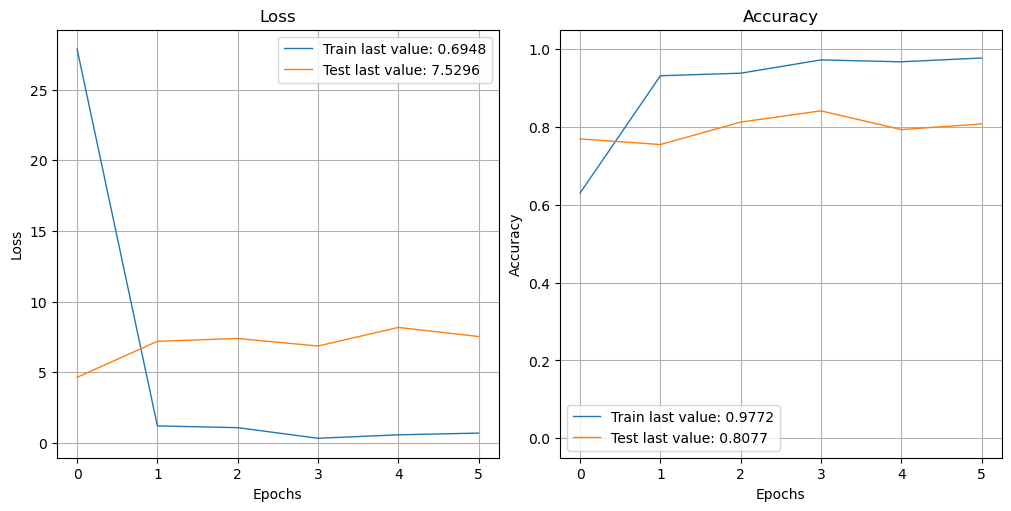

Evaluation terminée ...!


In [27]:
# evaluate(model_save_path, MODEL_NAME, history1_VGG16)
ari, test_accuracy, test_loss, processing_time=evaluate(model_save_path, MODEL_NAME, history1_VGG16, 
                                                        test_generator,  STEP_SIZE_TEST, processing_time)


# evaluation = model.evaluate(X_test, y_cat_test)
# print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

# y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred, axis=1)
# cm = confusion_matrix(y_test, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=labels)

# # NOTE: Fill all variables here with default values of the plot_confusion_matrix
# fig, ax = plt.subplots(figsize=(10, 10))
# disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')
# plt.show()

---------
- [x] **Constat**: Sur les données d’entraînement, le modèle est très performant mais sur les **données de validation** il est moins en moins bon. En effet, ***l'accuracy de l'entrainement*** continue de croitre, tandis que ***l'accuracy de la validation***. Par ailleurs, il existe un écart perceptible entre les deux accuracy (**training** vs **Validation**). <br> Lorsque la taille des données de training est faible, le modèle apprend ***parfois des bruits ou des détails indésirables*** ce qui réduit sa performance sur les données **test**.  Cela signifie que le modèle aura du mal à **généraliser sur un nouvel ensemble de données**.
- [x] Le modèle se spécialise sur les données d’entraînement mais n’est plus capable d’interpréter les données de validations, il est en ***overfitting***. Nous allons ***améliorer*** sa performance en utilisant la ***data augmentation***.

### <font color="#337da4" id="3">3. Data Augmentation </font>
----------------------------

L’idée derrière la ***Data Augmentation*** est de reproduire les données préexistantes en leur appliquant une transformation aléatoire. Par exemple, appliquer un effet mirroir sur une image.
Lors de l’entraînement, notre modèle apprendra sur beaucoup plus de données tout en ne rencontrant jamais deux fois la même image.
***Le modèle est donc exposé à davantage de données***. Cela lui permet de mieux généraliser.

On peut faire de la **Data Augmentation** en utilisant la fonction ***ImageDataGenerator*** déjà utilisé plus haut et en **modifiant certains paramètres** :

- **rotation_range** pour faire pivoter une image de façon aléatoire sur une plage entre 0 et la valeur choisis (maximum 180 degré)
- **width_shift** et **height_shift** sont des plages (en fraction de la largeur ou de la hauteur totale) à l'intérieur desquelles on peut redimensionner aléatoirement des images verticalement ou horizontalement.
- **shear_range** est une plage permettant de rogner(découper) de manière aléatoire l'image
- **zoom_range** permet de zoomer de manière aléatoire à l'intérieur des images
- **horizontal_flip** retourne horizontalement des images de manière aléatoire (certaines seront retourner d'autres non)
- **fill_mode** est la stratégie utilisée pour remplir les pixels nouvellement créés, qui peuvent apparaître après un pivotage, un rognage, etc

On utilise **ces quelques paramètres** mais encore une fois, il en existe d'autres sur [la documentation Keras !](https://keras.io/api/preprocessing/image/)

In [28]:
augmented_datagen          = ImageDataGenerator(
    # rescale                =  1./255,
    rotation_range         =  40,
    width_shift_range      =  0.2,
    height_shift_range     =  0.2,
    shear_range            =  0.2,
    zoom_range             =  0.2,
    horizontal_flip        =  True,
    preprocessing_function = preprocess_input,)

Des générateurs intégré à ***Keras***:
- [x] ***flow*** : charge des données via une variable
- [x] ***flow_from_dataframe*** : charge des données via un dataframe Pandas
- [x] ***flow_from_directory*** : charge des données via un dossier spécifique sur l’ordinateur

In [29]:
train_generator            = augmented_datagen.flow_from_directory(
    train_dir,
    target_size            = (IMGSIZE, IMGSIZE),
    batch_size             =  BATCH_SIZE,
    class_mode             =  'categorical')

validation_generator       =  datagen.flow_from_directory(
    validation_dir,
    target_size            =  (IMGSIZE, IMGSIZE),
    batch_size             =  BATCH_SIZE,
    class_mode             = 'categorical')

Found 630 images belonging to 7 classes.
Found 210 images belonging to 7 classes.


La ***Data Augmentation*** concerne seulement les ***données d’entraînement…*** pour les autres données on initialise un générateur simple!

In [30]:
%%capture
model=create_model_VGG16() 

 Il est toujours conseillé de **sauvegarder** notre modèle après l’apprentissage, cela permet d’éviter de recommencer l’entraînement à chaque nouvelle session.

In [31]:
%%time
from keras.callbacks import ModelCheckpoint

# Création du callback
MODEL_NAME    = 'Model2_VGG16_augmented.h5'
# Créer un callback pour sauvegarder le meilleur modèle basé sur la précision de validation
checkpoint = ModelCheckpoint(f'{model_save_path}/{MODEL_NAME}', monitor='val_loss', 
                             verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# Liste de tous les callbacks que vous souhaitez utiliser (peut en ajouter d'autres si nécessaire)
callbacks_list = [checkpoint, es]

CPU times: total: 15.6 ms
Wall time: 8.49 ms


In [32]:
# Entraîner le modèle en utilisant les callbacks
start_time            = time.time()
history2_VGG16        = model.fit_generator(
    train_generator,
    steps_per_epoch   = STEP_SIZE_TRAIN,
    epochs=EPOCH,
    validation_data   = validation_generator,
    validation_steps  = STEP_SIZE_VALID,
    callbacks         = callbacks_list  # Utilisez la liste de callbacks
)
end_time              = time.time()
processing_time       = end_time - start_time
print("\nTemps de traitement:", round(processing_time / 60, 2), "minutes.")

Epoch 1/20
39/39 [==============================] - ETA: 0s - loss: 23.5922 - accuracy: 0.5179
Epoch 1: val_loss improved from inf to 4.69720, saving model to ./Flipkart/model\Model2_VGG16_augmented.h5
39/39 [==============================] - 156s 4s/step - loss: 23.5922 - accuracy: 0.5179 - val_loss: 4.6972 - val_accuracy: 0.7308
Epoch 2/20
39/39 [==============================] - ETA: 0s - loss: 2.5579 - accuracy: 0.7085
Epoch 2: val_loss improved from 4.69720 to 2.32523, saving model to ./Flipkart/model\Model2_VGG16_augmented.h5
39/39 [==============================] - 144s 4s/step - loss: 2.5579 - accuracy: 0.7085 - val_loss: 2.3252 - val_accuracy: 0.7500
Epoch 3/20
39/39 [==============================] - ETA: 0s - loss: 1.5385 - accuracy: 0.7590
Epoch 3: val_loss improved from 2.32523 to 1.85928, saving model to ./Flipkart/model\Model2_VGG16_augmented.h5
39/39 [==============================] - 151s 4s/step - loss: 1.5385 - accuracy: 0.7590 - val_loss: 1.8593 - val_accuracy: 0.73

In [33]:
# Charger le modèle sauvegardé
model2_VGG16 = load_model(os_path_join(model_save_path, f'{MODEL_NAME}'))

210/210 [==============================] - 42s 199ms/step
**************************************************
Resultats du best model :  Model2_VGG16_augmented.h5
**************************************************
[INFO] Test Loss:      2.3316
[INFO] Test accuracy:  77.14%
--------------------------------------------------


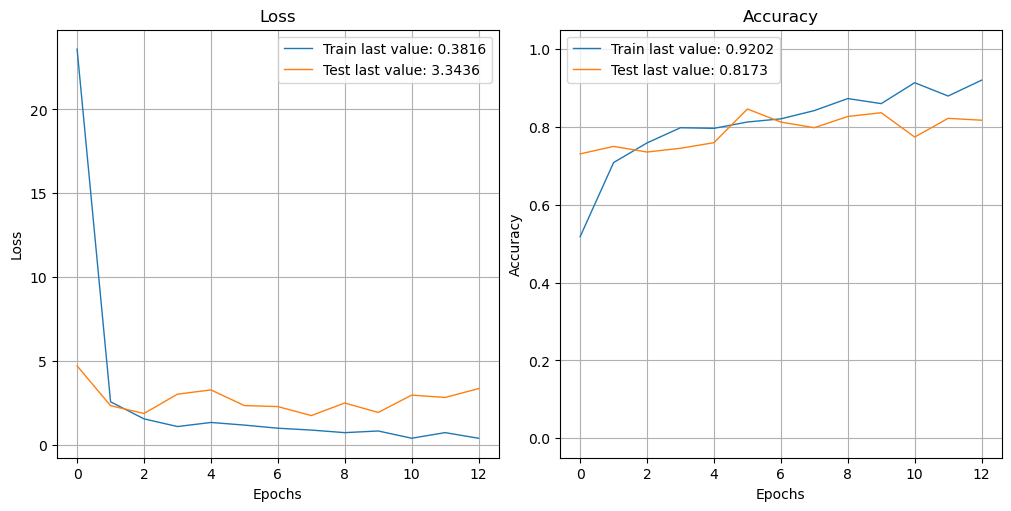

Evaluation terminée ...!


In [34]:
# evaluate(model_save_path, MODEL_NAME, history1_VGG16)
ari, test_accuracy, test_loss, processing_time=evaluate(model_save_path, MODEL_NAME, history2_VGG16, 
                                                        test_generator,  STEP_SIZE_TEST, processing_time)
# to_png()

 Nous pouvons aussi implémenter ***l'augmentation des données*** à l'aide des couches de prétraitement **Keras** suivantes : **tf.keras.layers.RandomFlip** , **tf.keras.layers.RandomRotation** et **tf.keras.layers.RandomZoom**. Celles-ci peuvent être incluses dans votre modèle comme d'autres couches et exécutées sur le **GPU**.

In [35]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Chemin vers le dossier contenant toutes les images
data_dir = IMG_FOLDER
# Chemin vers le dossier du jeu de données
dataset_dir = DATA_FOLDER+'/classification'

train_dir2 = os_path_join(dataset_dir, 'train') 
# validation_dir2 = os_path_join(dataset_dir, 'validation')
test_dir2 = os_path_join(dataset_dir, 'test')


for folder in [train_dir2,  test_dir2]:# validation_dir,
    try:
        shutil.rmtree(folder)
        print(f"Le dossier '{folder}' et son contenu ont été supprimés avec succès.")
    except OSError as e:
        print(f"{e}")


Le dossier './Flipkart/classification/train' et son contenu ont été supprimés avec succès.
Le dossier './Flipkart/classification/test' et son contenu ont été supprimés avec succès.


In [36]:
os_make_dir(train_dir2)
# os_make_dir(validation_dir)
os_make_dir(test_dir2)

In [37]:
from tqdm import tqdm
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
import cv2
import shutil

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


# Pour mélanger les images, classées initalement par classe
data   =  dfmarket.sample(frac=1, random_state=random_state).reset_index(drop=True)
data.head()

# Diviser les données en ensembles d'entraînement, de validation et de test
train_data, test_data  =  train_test_split(data, test_size=0.2, random_state=random_state)
# val_data, test_data    =  train_test_split(temp_data, test_size=0.5, random_state=random_state)



# Prétraitement des images pour le modèle VGG16 (mise à l'échelle)
def preprocess_vgg16(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img # img_to_array(img)
    #img_array = np.expand_dims(img_array, axis=0)
    #img_array = img_array.reshape((img_array.shape[0], img_array.shape[1], img_array.shape[2]))
    img_array = preprocess_input(img_array)
    return img_array

# def copy_images2(data, from_dir, dest_dir):
#     for index, row in tqdm(data.iterrows(), total=len(data)):
#         label      =  row['category1'].strip()
#         image_path =  os_path_join(from_dir, row['image'])
#         label_dir  =  os_path_join(dest_dir, label)        
#         # Traitement des images
#         img   = load_img(image_path, target_size=(224, 224)) # cv2.imread(image_path)
#         #img   = img_to_array(img)     
#         os_make_dir(label_dir)
#         # Chemin 
#         chemin_source      =  os_path_join(from_dir, row['image'])
#         chemin_destination =  os_path_join(label_dir, row['image'])
#         # # Copie
#         shutil.copy(chemin_source, chemin_destination)
#         #cv2.imwrite(os_path_join(label_dir, row['image']), img)

# extensions_images = ['.jpg', '.png', '.jpeg']
# def copy_images2(data, from_dir, dest_dir):
#     for index, row in tqdm(data.iterrows(), total=len(data)):
#         label = row['category1'].strip()
#         # Vérification de l'extension du fichier
#         if any(row['image'].lower().endswith(ext) for ext in extensions_images):
#             # Chemin 
#             chemin_source      =  os_path_join(from_dir, row['image'])
#             # Convertir l'image en niveaux de gris
#             image = Image.open(chemin_source)
#             image_gray = image.convert("L")
#             label_dir      =  os_path_join(dest_dir, label)
#             os_make_dir(label_dir)
#             chemin_destination =  os_path_join(label_dir, row['image'])
#                 # Enregistrer l'image convertie en niveaux de gris dans le dossier de destination
#             image_gray.save(chemin_destination)
#             # Copie
#             # shutil.copy(chemin_source, chemin_destination)
#     print(dest_dir)        
#     print("Copie des images terminée.")        
# Utilisation de la fonction copy_images avec une barre de progression
copy_images(train_data, IMG_FOLDER, train_dir2)
copy_images(test_data, IMG_FOLDER, test_dir2)


100%|███████████████████████████████████████████████████████████████████████████████| 840/840 [00:02<00:00, 281.55it/s]


./Flipkart/classification/train
Copie des images terminée.


100%|███████████████████████████████████████████████████████████████████████████████| 210/210 [00:00<00:00, 338.21it/s]

./Flipkart/classification/test
Copie des images terminée.


In [38]:
def count_files(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

print(f'{train_dir2:34} contient : {count_files(train_dir2)} images')
print(f'{test_dir2:34} contient : {count_files(test_dir2)} images')

./Flipkart/classification/train    contient : 840 images
./Flipkart/classification/test     contient : 210 images


In [39]:
import tensorflow as tf

batch_size = 16

def dataset_fct(path, validation_split=0.2, data_type='training'):
    dataset = tf.keras.utils.image_dataset_from_directory(
        path,
        labels='inferred',
        label_mode='categorical',
        batch_size=batch_size,
        image_size=(224, 224),
        shuffle=True,
        seed=42,
        validation_split=validation_split,
        subset=data_type
    )
    return dataset


train_dataset = dataset_fct(train_dir2, validation_split=0.2, data_type='training')
validation_dataset = dataset_fct(train_dir2, validation_split=0.2, data_type='validation')
test_dataset = dataset_fct(test_dir2, validation_split=0, data_type=None)

Found 840 files belonging to 7 classes.
Using 672 files for training.
Found 840 files belonging to 7 classes.
Using 168 files for validation.
Found 210 files belonging to 7 classes.


In [40]:
hasattr(tf.keras.layers, "RandomFlip")

True

Une autre technique pour réduire **l'overfiting** consiste à introduire une régularisation des **Dropout** dans le réseau.

Lorsque vous appliquez un **Dropout** à une couche, elle supprime de manière aléatoire (en définissant l'activation sur zéro) un certain nombre d'unités de sortie de la couche pendant le processus d'apprentissage. Le **Dropout** prend un nombre fractionnaire comme valeur d'entrée, sous la forme de ***0,1;  0,2; 0,4***, etc. Cela signifie abandonner ***10%, 20% ou 40%*** des unités de sortie au hasard de la couche appliquée.

In [41]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

def create_model_fct():

    # Data augmentation
    data_augmentation = Sequential([
        preprocessing.RandomFlip("horizontal", input_shape=(224, 224, 3)),
        preprocessing.RandomRotation(0.1),
        preprocessing.RandomZoom(0.1),
    ])
    
    # Récupération modèle pré-entraîné
    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        layer.trainable = False

    # Définition du nouveau modèle
    model = Sequential([
        data_augmentation,
        # preprocessing.Rescaling(1./255),  # Normalisation des images
        # preprocessing.Rescaling(1./127.5, offset=-1),
        model_base,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    # Compilation du modèle
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    print(model.summary())

    return model


In [42]:
model=create_model_fct()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 7)                 1799      
                                                      

In [43]:
# Création du modèle
with tf.device('/gpu:0'): 
    model = create_model_fct()
    # Création du callback
    MODEL_NAME    = 'Model3_VGG16_aug.h5'
    # Créer un callback pour sauvegarder le meilleur modèle basé sur la précision de validation
    checkpoint = ModelCheckpoint(f'{model_save_path}/{MODEL_NAME}', monitor='val_loss', 
                                 verbose=1, save_best_only=True, mode='min')
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    callbacks_list = [checkpoint, es]


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 7)                 1799      
                                                      

In [44]:
%%time
start_time = time.time()
with tf.device('/gpu:0'): 
    history3_VGG16 = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    batch_size=batch_size, epochs=EPOCH, callbacks=callbacks_list, verbose=1)

end_time = time.time()
processing_time = end_time - start_time
print("\nTemps de traitement:", round(processing_time / 60, 2), "minutes.")

Epoch 1/20
42/42 [==============================] - ETA: 0s - loss: 5.0721 - accuracy: 0.4405
Epoch 1: val_loss improved from inf to 1.57978, saving model to ./Flipkart/model\Model3_VGG16_aug.h5
42/42 [==============================] - 144s 3s/step - loss: 5.0721 - accuracy: 0.4405 - val_loss: 1.5798 - val_accuracy: 0.7381
Epoch 2/20
42/42 [==============================] - ETA: 0s - loss: 1.8690 - accuracy: 0.6652
Epoch 2: val_loss improved from 1.57978 to 1.32875, saving model to ./Flipkart/model\Model3_VGG16_aug.h5
42/42 [==============================] - 138s 3s/step - loss: 1.8690 - accuracy: 0.6652 - val_loss: 1.3287 - val_accuracy: 0.7381
Epoch 3/20
42/42 [==============================] - ETA: 0s - loss: 1.1194 - accuracy: 0.7024
Epoch 3: val_loss improved from 1.32875 to 1.17710, saving model to ./Flipkart/model\Model3_VGG16_aug.h5
42/42 [==============================] - 138s 3s/step - loss: 1.1194 - accuracy: 0.7024 - val_loss: 1.1771 - val_accuracy: 0.7321
Epoch 4/20
42/42 

In [45]:
print(MODEL_NAME)
model3_VGG16 = load_model(os_path_join(model_save_path, f'{MODEL_NAME}'))

Model3_VGG16_aug.h5


14/14 [==============================] - 34s 2s/step - loss: 1.0900 - accuracy: 0.8000
**************************************************
Resultats du best model :  Model3_VGG16_aug.h5
**************************************************
[INFO] Test Loss:      1.0900
[INFO] Test accuracy:  80.00%
--------------------------------------------------


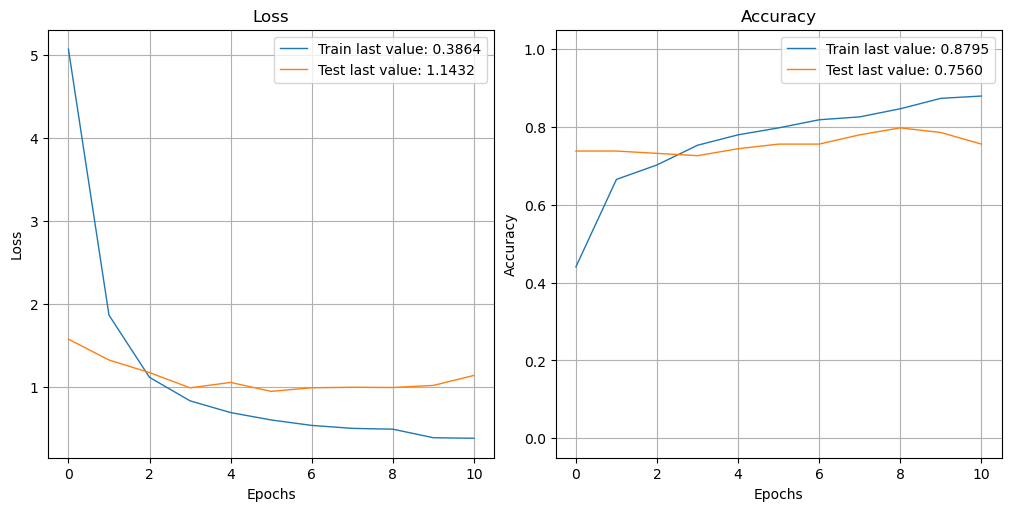

Evaluation terminée ...!


In [46]:
# train_generator = datagen.flow_from_directory(train_dir,
#                                               batch_size=BATCH_SIZE,
#                                               target_size=(IMGSIZE, IMGSIZE),
#                                               class_mode='categorical')

# validation_generator = datagen.flow_from_directory(
#     validation_dir,
#     batch_size=BATCH_SIZE,
#     target_size=(IMGSIZE, IMGSIZE),
#     class_mode='categorical')
ari=0
def evaluate2(model_save_path, MODEL_NAME, history, test_generator,  processing_time):
    # start_time = time.time()
    modele = load_model(os_path_join(model_save_path, f'{MODEL_NAME}'))
    (test_loss, test_accuracy) = modele.evaluate(test_generator)
    # Prédire les étiquettes sur les données de test

    # y_pred_probs = modele.predict(test_generator)
    # y_pred_labels = np.argmax(y_pred_probs, axis=1)
    # y_test = modele.labels
    # # Calculer l'ARI
    # ari = adjusted_rand_score(y_test, y_pred_labels)

    print(clr.color + '*' * 50 + clr.end)
    print(clr.start + f'Resultats du best model :  {MODEL_NAME}' + clr.end)
    print(clr.color + '*' * 50 + clr.end)
    print("[INFO] Test Loss:      {:.4f}".format(test_loss))
    print("[INFO] Test accuracy:  {:.2f}%".format(test_accuracy * 100))
    print(clr.color + '-' * 50 + clr.end)
    show_history(history)
    plot_history(history, path=os_path_join(GRAPH_FOLDER, f'{MODEL_NAME[:-3]}_learning_curve.png'))
    plt.close()
    print('Evaluation terminée ...!')
    # end_time = time.time()
    # processing_time = end_time - start_time
    # print("\nTemps de traitement:", round(processing_time / 60, 2), "minutes.")=0
    performances_summary2(MODEL_NAME, ari, test_accuracy, processing_time, test_loss)
    
    return ari, test_accuracy, test_loss, processing_time


ari, test_accuracy, test_loss, processing_time=evaluate2(model_save_path, MODEL_NAME, history3_VGG16, 
                                                        test_dataset, processing_time)

In [47]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model3_VGG16.evaluate(test_dataset, verbose=1)
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

14/14 [==============================] - 33s 2s/step - loss: 1.0900 - accuracy: 0.8000

Test Loss: 1.0900050401687622
Test Accuracy: 0.800000011920929


### Bilan de la classification supervisée

In [48]:
compare=list_pickles_files(f'{OUT_FOLDER}', prefix='measures_Model')
compare

['measures_Model1_VGG16.pickle',
 'measures_Model2_VGG16_augmented.pickle',
 'measures_Model3_VGG16_aug.pickle']

In [49]:
list_data=[load_pickle(f'{OUT_FOLDER}/{filename}') for filename in ['measures_Model1_VGG16.pickle',
 'measures_Model2_VGG16_augmented.pickle',
 'measures_Model3_VGG16_aug.pickle']]

resultat=pd.concat(list_data, axis=0)
resultat.drop(columns=['ARI'], inplace=True)

format_mapping = {
    'Accuracy': '{:.2%}',
    'Loss': '{:.3f}',
    'Time_min': '{:.2f}',
}

# Appliquer les formats spécifiques à chaque colonne
for col, format_str in format_mapping.items():
    resultat[col] = resultat[col].apply(lambda x: format_str.format(x))
resultat

,Model,Accuracy,Loss,Time_min
0,Model1_VGG16.h5,77.62%,6.716,15.57
0,Model2_VGG16_augmented.h5,77.14%,2.332,31.57
0,Model3_VGG16_aug.h5,80.00%,1.090,25.11


In [50]:
import dataframe_image as dfi
dfi.export(resultat, imgPath+'Compare_CNN_Supervisee.png')

---
***La data aumentation*** est permis d'***améliorer*** la performance du modèle. En effet, nous remarquons des ***performances similaires*** sur les données d'***entrainement*** et de ***test***. Donc, il est en mesure de generaliser sur de nouvelles données. 

### <font color="#337da4" id="4">4. API </font>
----------------------------

In [9]:
!python script_api.py

                              foodId  ...                                              image
0  food_a656mk2a5dmqb2adiamu6beihduu  ...  https://www.edamam.com/food-img/a71/a718cf3c52...
1  food_b753ithamdb8psbt0w2k9aquo06c  ...                                               None
2  food_b3dyababjo54xobm6r8jzbghjgqe  ...  https://www.edamam.com/food-img/d88/d88b64d973...
3  food_a9e0ghsamvoc45bwa2ybsa3gken9  ...                                               None
4  food_an4jjueaucpus2a3u1ni8auhe7q9  ...                                               None
5  food_bmu5dmkazwuvpaa5prh1daa8jxs0  ...  https://www.edamam.com/food-img/ab2/ab2459fc2a...
6  food_alpl44taoyv11ra0lic1qa8xculi  ...                                               None
7  food_byap67hab6evc3a0f9w1oag3s0qf  ...                                               None
8  food_am5egz6aq3fpjlaf8xpkdbc2asis  ...                                               None
9  food_bcz8rhiajk1fuva0vkfmeakbouc0  ...                             

In [10]:
# %run script_api.py